#Image ATM Imagenette Example

In [1]:
# install imageatm via PyPi
!pip install imageatm

    100% |████████████████████████████████| 1.5MB 16.1MB/s 
    100% |████████████████████████████████| 51kB 17.2MB/s 
    100% |████████████████████████████████| 5.3MB 7.7MB/s 
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
  Found existing installation: rsa 4.0
    Uninstalling rsa-4.0:
      Successfully uninstalled rsa-4.0
  Found existing installation: botocore 1.12.113
    Uninstalling botocore-1.12.113:
      Successfully uninstalled botocore-1.12.113


In [1]:
# get imagenette 320px dataset https://github.com/fastai/imagenette
!wget --no-check-certificate \
    https://s3.amazonaws.com/fast-ai-imageclas/imagenette-320.tgz

!wget --no-check-certificate \
  https://raw.githubusercontent.com/ozendelait/wordnet-to-json/master/mapping_imagenet.json

--2019-03-18 14:57:40--  https://s3.amazonaws.com/fast-ai-imageclas/imagenette-320.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.82.60
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.82.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341289752 (325M) [application/x-tar]
Saving to: ‘imagenette-320.tgz’

imagenette-320.tgz  100%[===================>] 325.48M  86.7MB/s    in 4.0s    

2019-03-18 14:57:44 (82.1 MB/s) - ‘imagenette-320.tgz’ saved [341289752/341289752]

--2019-03-18 14:57:48--  https://raw.githubusercontent.com/ozendelait/wordnet-to-json/master/mapping_imagenet.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 135584 (132K) [text/plain]
Saving to: ‘mapping_imagenet.json’

mapping_imagenet.js 100%[=

In [0]:
# untar the dataset
!tar -xzf imagenette-320.tgz

In [0]:
# create mapping for Imagenette classes and prepare the data.json
import os
import json

def load_json(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

mapping = load_json('mapping_imagenet.json')

mapping_synset_txt = {}
for i, j in enumerate(mapping):
  mapping_synset_txt[j['v3p0']] = j['label'].split(',')[0]

classes = os.listdir('imagenette-320/train')
sample_json = []
for c in classes:
  filenames = os.listdir('imagenette-320/train/{}'.format(c))
  for i in filenames:
      sample_json.append(
          {
          'image_id': i,
          'label': mapping_synset_txt[c]
          }
          )

with open('data.json', 'w') as outfile:
    json.dump(sample_json, outfile, indent=4, sort_keys=True)

In [4]:
!head data.json

[
    {
        "image_id": "n03394916_4023.JPEG",
        "label": "French horn"
    },
    {
        "image_id": "n03394916_29762.JPEG",
        "label": "French horn"
    },
    {


In [0]:
# prepare our image directory
IMAGE_DIR ='images'

if not os.path.exists(IMAGE_DIR):
  os.makedirs(IMAGE_DIR)

classes = os.listdir('imagenette-320/train')
for c in classes:
  cmd = 'cp -r {}. {}'.format(os.path.join('imagenette-320/train', c) + '/', os.path.join(IMAGE_DIR))
  os.system(cmd)

In [6]:
!ls

data.json	imagenette-320.tgz  mapping_imagenet.json
imagenette-320	images		    sample_data


In [7]:
from imageatm.components import DataPrep

dp = DataPrep(
    image_dir = 'images/',
    samples_file = 'data.json',
    job_dir = 'imagenette'
)

dp.run(resize=False)

Using TensorFlow backend.



****** Running image validation ******



100%|██████████| 12894/12894 [00:30<00:00, 418.00it/s]



****** Running samples validation ******

Class distribution after validation:
English springer: 1300 (10.1%)
French horn: 1300 (10.1%)
cassette player': 1300 (10.1%)
chain saw: 1194 (9.3%)
church: 1300 (10.1%)
garbage truck: 1300 (10.1%)
gas pump: 1300 (10.1%)
golf ball': 1300 (10.1%)
parachute: 1300 (10.1%)
tench: 1300 (10.1%)
Class mapping:
{0: 'English springer', 1: 'French horn', 2: "cassette player'", 3: 'chain saw', 4: 'church', 5: 'garbage truck', 6: 'gas pump', 7: "golf ball'", 8: 'parachute', 9: 'tench'}

****** Creating train/val/test sets ******

Split distribution: train: 0.70, val: 0.1, test: 0.2

Partial split distribution: train: 0.70, val: 0.10, test: 0.20

Train set:
0: 910 (10.1%)
1: 910 (10.1%)
2: 910 (10.1%)
3: 835 (9.3%)
4: 910 (10.1%)
5: 910 (10.1%)
6: 910 (10.1%)
7: 910 (10.1%)
8: 910 (10.1%)
9: 910 (10.1%)
Val set:
0: 130 (10.1%)
1: 130 (10.1%)
2: 130 (10.1%)
3: 120 (9.3%)
4: 130 (10.1%)
5: 130 (10.1%)
6: 130 (10.1%)
7: 130 (10.1%)
8: 130 (10.1%)
9: 130 (10.1%

In [8]:
from imageatm.components import Training

trainer = Training(
     dp.image_dir, dp.job_dir, epochs_train_dense=3, epochs_train_all=1, batch_size=64,
)

trainer.run()

17227776/17225924 [==============================] - 0s 0us/step

****** Train dense layers ******

Epoch 1/3
142/142 [==============================] - 61s 429ms/step - loss: 1.5068 - acc: 0.5821 - val_loss: 0.1194 - val_acc: 0.9744

Epoch 00001: val_acc improved from -inf to 0.97442, saving model to /content/imagenette/models/model_mobilenet_01_0.974.hdf5
Epoch 2/3
142/142 [==============================] - 47s 329ms/step - loss: 0.4639 - acc: 0.8473 - val_loss: 0.0785 - val_acc: 0.9760

Epoch 00002: val_acc improved from 0.97442 to 0.97597, saving model to /content/imagenette/models/model_mobilenet_02_0.976.hdf5
Epoch 3/3
142/142 [==============================] - 60s 420ms/step - loss: 0.3347 - acc: 0.8954 - val_loss: 0.0654 - val_acc: 0.9798

Epoch 00003: val_acc improved from 0.97597 to 0.97984, saving model to /content/imagenette/models/model_mobilenet_03_0.980.hdf5

****** Train all layers ******

Epoch 4/4
142/142 [==============================] - 131s 921ms/step - loss: 0.26


****** Load model ******

loaded /content/imagenette/models/model_mobilenet_04_0.986.hdf5


****** Calculate distribution on test set ******



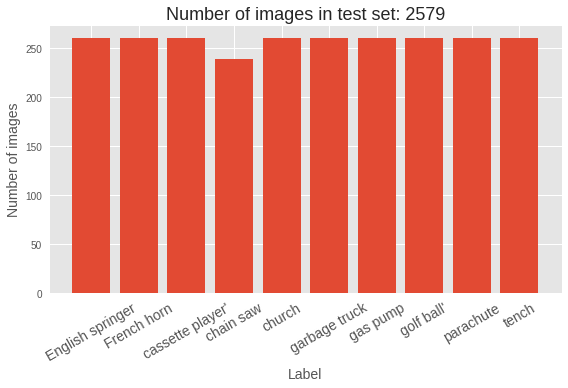


****** Make prediction on test set ******

162/162 [==============================] - 18s 112ms/step

****** Calculate classification report ******


Model achieves 97.75% accuracy on test set

                  precision    recall  f1-score   support

English springer       1.00      0.99      1.00       260
     French horn       0.97      0.98      0.98       260
cassette player'       0.99      0.96      0.98       260
       chain saw       0.90      0.97      0.94       239
          church       0.99      0.98      0.99       260
   garbage truck       1.00      0.97      0.98       260
        gas pump       0.97      0.96      0.97       260
      golf ball'       0.98      0.98      0.98       260
       parachute       0.97      0.98      0.98       260
           tench       1.00      1.00      1.00       260

       micro avg       0.98      0.98      0.98      2579
       macro avg       0.98      0.98      0.98      2579
    weighted avg       0.98      0.98      0.98  

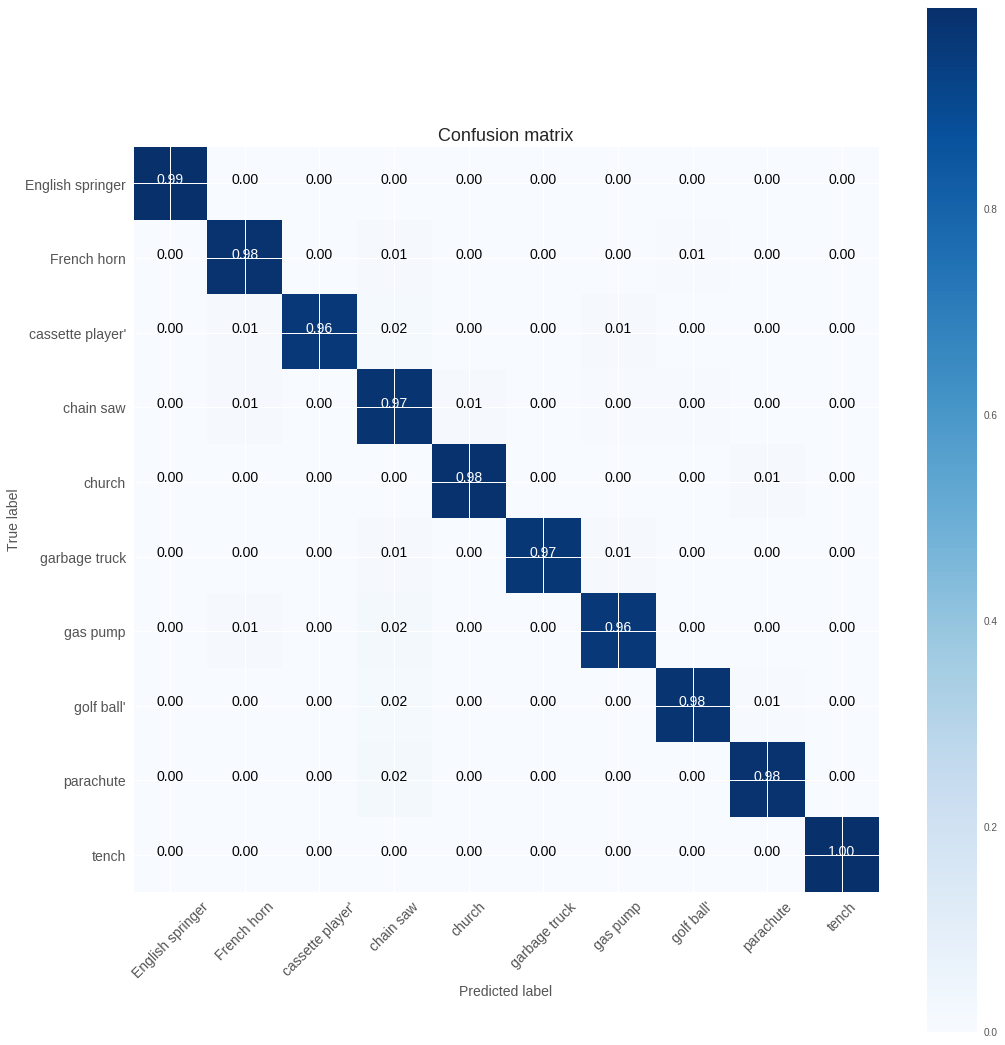

In [9]:
from imageatm.components import Evaluation

e = Evaluation(image_dir=dp.image_dir, job_dir=dp.job_dir)

e.run()

In [0]:
c, w = e.get_correct_wrong_examples(label=1)

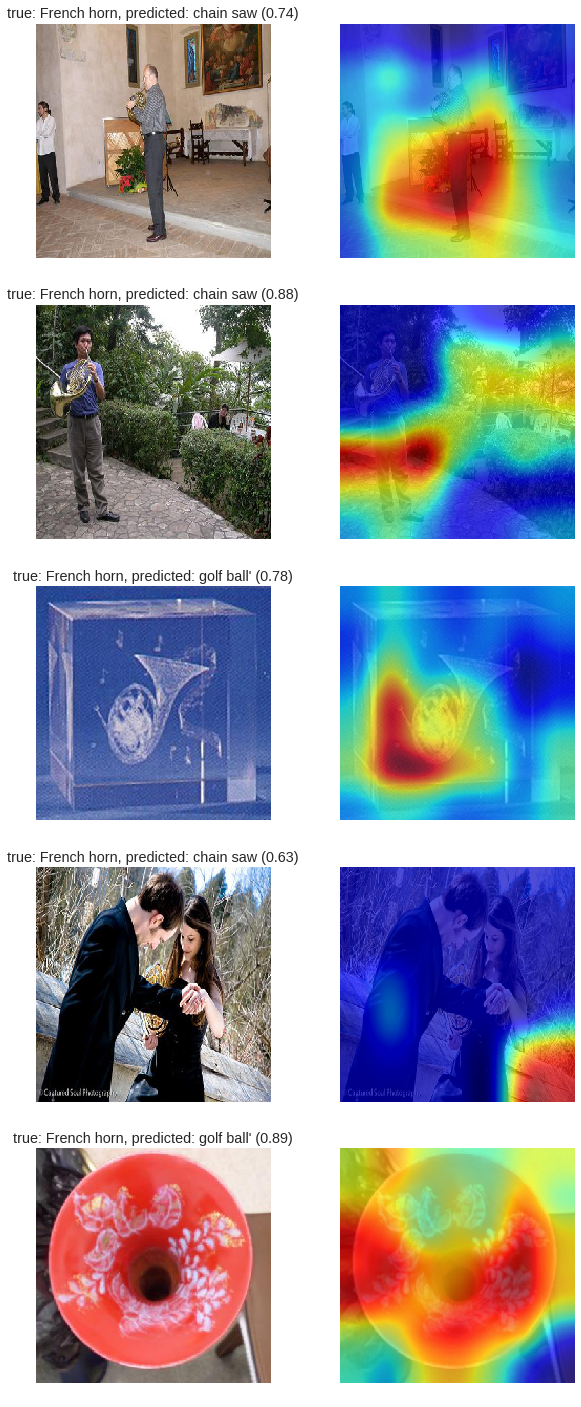

In [11]:
e.visualize_images(w, show_heatmap=True)

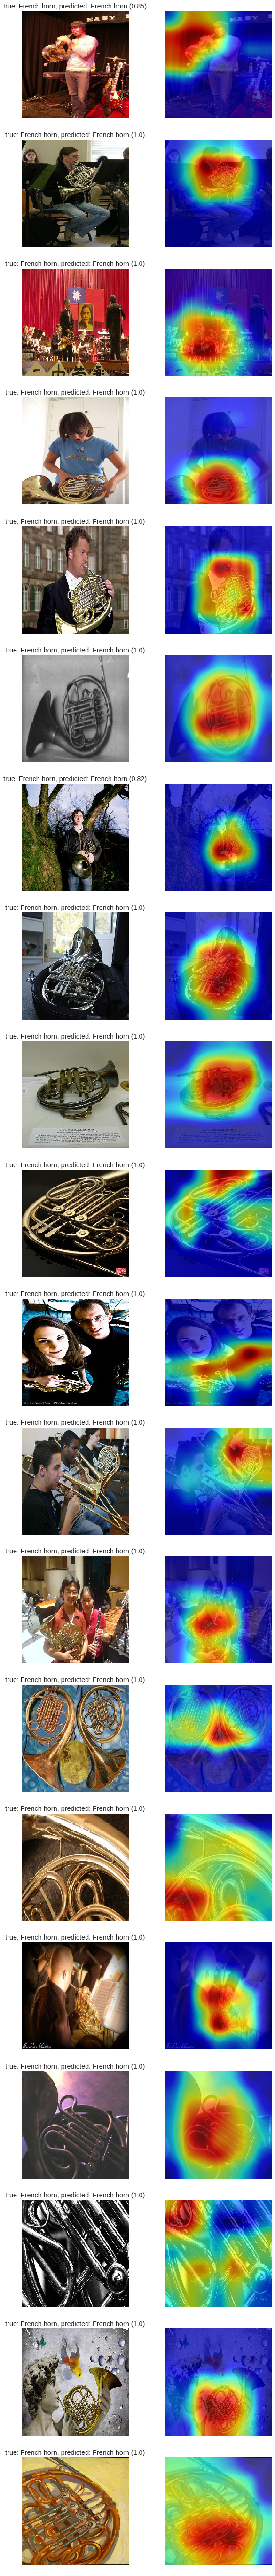

In [12]:
e.visualize_images(c, show_heatmap=True)